In [1]:
import os
import numpy as np
import pickle as pkl
import networkx as nx
import matplotlib.pyplot as plt

import utils

from sklearn.metrics import roc_auc_score
from scipy import stats

In [8]:
n_repeats = 20
timesteps = 30
data = 'block'

if data == 'regular': 
    data_name = 'si_regular_20r_30t'
    with open(f'./data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)
if data == 'powerlaw': 
    data_name = f'si_powerlaw_20r_30t'
    with open(f'./data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)
if data == 'random': 
    data_name = f'si_random_20r_30t'
    with open(f'./data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)
if data == 'block': 
    data_name = f'si_block_20r_30t'
    with open(f'./data_proc/{data_name}/history.pkl', 'rb') as file: 
        graphs = pkl.load(file)

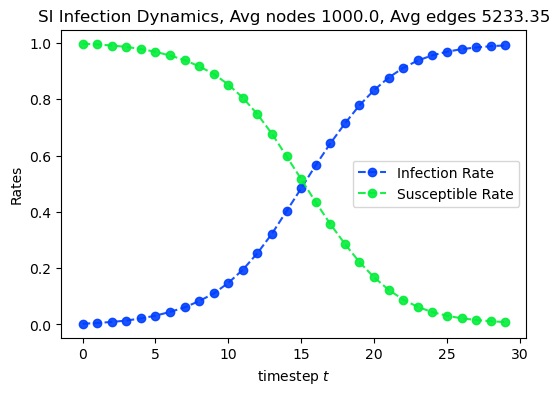

In [9]:
n_nodes_0 = []
n_edges_0 = []
inf_rates = [[] for i in range(n_repeats)]
sus_rates = [[] for i in range(n_repeats)]
for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        if idx == 0: 
            n_nodes_0.append(g.number_of_nodes())
            n_edges_0.append(g.number_of_edges())

        inf_rates[r].append(utils.sis_infected_rate(g))
        sus_rates[r].append(utils.sis_susceptible_rate(g))
    
fig, ax = plt.subplots(ncols=1, figsize=(6, 4))

ax.plot(np.mean(inf_rates, axis=0), '--o', label='Infection Rate', alpha=.9)
ax.plot(np.mean(sus_rates, axis=0), '--o', label='Susceptible Rate', alpha=.9)
ax.set_title(f'SI Infection Dynamics, Avg nodes {np.mean(n_nodes_0)}, Avg edges {np.mean(n_edges_0)}')
ax.set_xlabel('timestep $t$')
ax.set_ylabel('Rates')
ax.legend();

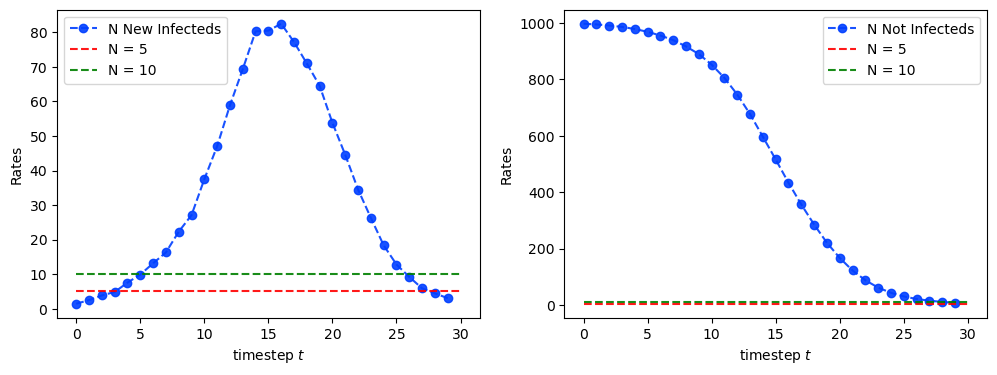

In [10]:
n_infecteds = [[] for i in range(n_repeats)]
n_ninfecteds = [[] for i in range(n_repeats)]

for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        y = np.array(list(nx.get_node_attributes(g, 'exposure').values()))
        y_mask = np.array(list(nx.get_node_attributes(g, 'positive').values())) == 0
        n_infecteds[r].append(np.sum(y[y_mask]))
        n_ninfecteds[r].append(np.sum(y[y_mask] == 0))

n_infecteds = np.array(n_infecteds)
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].plot(np.mean(n_infecteds, axis=0), '--o', label='N New Infecteds', alpha=.9)
ax[0].hlines(y=5, xmin=0, xmax=timesteps, colors='red', linestyles='--', label='N = 5', alpha=.9)
ax[0].hlines(y=10, xmin=0, xmax=timesteps, colors='green', linestyles='--', label='N = 10', alpha=.9)
ax[0].set_xlabel('timestep $t$')
ax[0].set_ylabel('Rates')
ax[0].legend();

ax[1].plot(np.mean(n_ninfecteds, axis=0), '--o', label='N Not Infecteds', alpha=.9)
ax[1].hlines(y=5, xmin=0, xmax=timesteps, colors='red', linestyles='--', label='N = 5', alpha=.9)
ax[1].hlines(y=10, xmin=0, xmax=timesteps, colors='green', linestyles='--', label='N = 10', alpha=.9)
ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('Rates')
ax[1].legend();

In [11]:
homs_l, homs_t = [[] for i in range(n_repeats)], [[] for i in range(n_repeats)]

for r in range(n_repeats): 
    graphs_current = graphs[r * timesteps: (r + 1) * timesteps]
    for idx, g in enumerate(graphs_current): 
        hom_l = utils.compute_label_homophily(g)
        hom_t = utils.compute_transition_homophily(g)
        homs_l[r].append(hom_l)
        homs_t[r].append(hom_t)
        
# global homophily
homs_lm, homs_le = utils.compute_means_errs(np.array(homs_l))
homs_tm, homs_te = utils.compute_means_errs(np.array(homs_t))

perf_m_sgc, perf_e_sgc, perf_sgc = utils.compute_perfs_stat_mean(f'./{data_name}', 'sgc', 16, n_repeats, timesteps, top_k=4)
perf_m_gcn, perf_e_gcn, perf_gcn = utils.compute_perfs_stat_mean(f'./{data_name}', 'gcn', 16, n_repeats, timesteps, top_k=4)
perf_m_gin, perf_e_gin, perf_gin = utils.compute_perfs_stat_mean(f'./{data_name}', 'gin', 16, n_repeats, timesteps, top_k=4)
perf_m_gat, perf_e_gat, perf_gat = utils.compute_perfs_stat_mean(f'./{data_name}', 'gat', 16, n_repeats, timesteps, top_k=4)

perf_m_sage, perf_e_sage, perf_sage = utils.compute_perfs_stat_mean(f'./{data_name}', 'gsage', 16, n_repeats, timesteps, top_k=4)
perf_m_gcnii, perf_e_gcnii, perf_gcnii = utils.compute_perfs_stat_mean(f'./{data_name}', 'gcnii', 16, n_repeats, timesteps, top_k=4)
perf_m_fagcn, perf_e_fagcn, perf_fagcn = utils.compute_perfs_stat_mean(f'./{data_name}', 'fagcn', 16, n_repeats, timesteps, top_k=4)

sgc: 0.91 $\pm$ 0.02
gcn: 0.91 $\pm$ 0.02
gin: 0.81 $\pm$ 0.01
gat: 0.85 $\pm$ 0.02
gsage: 0.94 $\pm$ 0.01
gcnii: 0.91 $\pm$ 0.01
fagcn: 0.93 $\pm$ 0.01


SGC: 0.43 $\pm$ 0.15
SGC: 0.84 $\pm$ 0.07
GCN: 0.44 $\pm$ 0.15
GCN: 0.83 $\pm$ 0.07
GIN: 0.31 $\pm$ 0.19
GIN: 0.88 $\pm$ 0.06
GAT: 0.46 $\pm$ 0.13
GAT: 0.80 $\pm$ 0.08
SAGE: 0.51 $\pm$ 0.10
SAGE: 0.78 $\pm$ 0.09
GCNII: 0.42 $\pm$ 0.16
GCNII: 0.84 $\pm$ 0.08
FAGCN: 0.50 $\pm$ 0.13
FAGCN: 0.78 $\pm$ 0.09


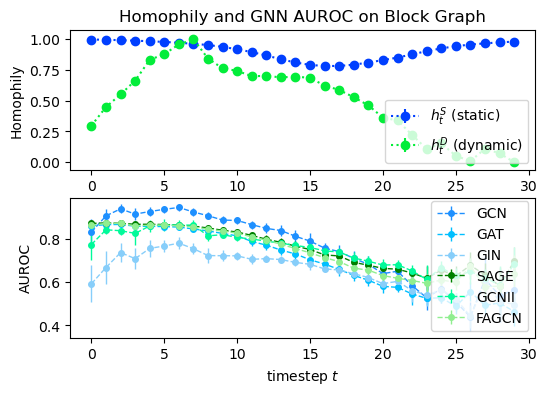

In [13]:
threshold = 10
sgc_hl_m, sgc_hl_e = utils.compute_correlation(homs_l, perf_sgc, n_infecteds, threshold)
sgc_ht_m, sgc_ht_e = utils.compute_correlation(homs_t, perf_sgc, n_infecteds, threshold)

gcn_hl_m, gcn_hl_e = utils.compute_correlation(homs_l, perf_gcn, n_infecteds, threshold)
gcn_ht_m, gcn_ht_e = utils.compute_correlation(homs_t, perf_gcn, n_infecteds, threshold)

gin_hl_m, gin_hl_e = utils.compute_correlation(homs_l, perf_gin, n_infecteds, threshold)
gin_ht_m, gin_ht_e = utils.compute_correlation(homs_t, perf_gin, n_infecteds, threshold)

gat_hl_m, gat_hl_e = utils.compute_correlation(homs_l, perf_gat, n_infecteds, threshold)
gat_ht_m, gat_ht_e = utils.compute_correlation(homs_t, perf_gat, n_infecteds, threshold)

sage_hl_m, sage_hl_e = utils.compute_correlation(homs_l, perf_sage, n_infecteds, threshold)
sage_ht_m, sage_ht_e = utils.compute_correlation(homs_t, perf_sage, n_infecteds, threshold)

gcnii_hl_m, gcnii_hl_e = utils.compute_correlation(homs_l, perf_gcnii, n_infecteds, threshold)
gcnii_ht_m, gcnii_ht_e = utils.compute_correlation(homs_t, perf_gcnii, n_infecteds, threshold)

fagcn_hl_m, fagcn_hl_e = utils.compute_correlation(homs_l, perf_fagcn, n_infecteds, threshold)
fagcn_ht_m, fagcn_ht_e = utils.compute_correlation(homs_t, perf_fagcn, n_infecteds, threshold)

print(f'SGC: {sgc_hl_m:.2f} $\pm$ {sgc_hl_e:.2f}')
print(f'SGC: {sgc_ht_m:.2f} $\pm$ {sgc_ht_e:.2f}')

print(fr'GCN: {gcn_hl_m:.2f} $\pm$ {gcn_hl_e:.2f}')
print(fr'GCN: {gcn_ht_m:.2f} $\pm$ {gcn_ht_e:.2f}')

print(fr'GIN: {gin_hl_m:.2f} $\pm$ {gin_hl_e:.2f}')
print(fr'GIN: {gin_ht_m:.2f} $\pm$ {gin_ht_e:.2f}')

print(fr'GAT: {gat_hl_m:.2f} $\pm$ {gat_hl_e:.2f}')
print(fr'GAT: {gat_ht_m:.2f} $\pm$ {gat_ht_e:.2f}')

print(fr'SAGE: {sage_hl_m:.2f} $\pm$ {sage_hl_e:.2f}')
print(fr'SAGE: {sage_ht_m:.2f} $\pm$ {sage_ht_e:.2f}')

print(fr'GCNII: {gcnii_hl_m:.2f} $\pm$ {gcnii_hl_e:.2f}')
print(fr'GCNII: {gcnii_ht_m:.2f} $\pm$ {gcnii_ht_e:.2f}')

print(fr'FAGCN: {fagcn_hl_m:.2f} $\pm$ {fagcn_hl_e:.2f}')
print(fr'FAGCN: {fagcn_ht_m:.2f} $\pm$ {fagcn_ht_e:.2f}')

plt.style.use('seaborn-bright')
# plt.style.use('seaborn-v0_8-bright')
# plt.style.use('seaborn-v0_8-poster')
# plt.rc('font', size=10)
# plt.rc('legend', fontsize=8)
fig, ax = plt.subplots(nrows=2, figsize=(6, 4))

ax[0].errorbar(x=np.arange(homs_lm.shape[0]), y=homs_lm, yerr=homs_le, fmt=':o', label='$h_t^S$ (static)')
ax[0].errorbar(x=np.arange(homs_tm.shape[0]), y=utils.normalize(homs_tm), yerr=homs_te, fmt=':o', label='$h_t^D$ (dynamic)')
ax[0].set_title(f'Homophily and GNN AUROC on Block Graph')
# ax[0].set_xlabel('timestep $t$')
ax[0].set_ylabel('Homophily')
ax[0].legend(loc='lower right')
# ax[0].grid()

ax[1].errorbar(x=np.arange(perf_m_gcn.shape[0]), y=perf_m_gcn, yerr=perf_e_gcn, color='dodgerblue', fmt='--o', lw=1, ms=4, label=fr'GCN')
ax[1].errorbar(x=np.arange(perf_m_gat.shape[0]), y=perf_m_gat, yerr=perf_e_gat, color='deepskyblue', fmt='--o', lw=1, ms=4, label=fr'GAT')
ax[1].errorbar(x=np.arange(perf_m_gin.shape[0]), y=perf_m_gin, yerr=perf_e_gin, color='lightskyblue', fmt='--o', lw=1, ms=4, label=fr'GIN')

ax[1].errorbar(x=np.arange(perf_m_sage.shape[0]), y=perf_m_sage, yerr=perf_e_sage, color='green', fmt='--o', lw=1, ms=4, label=fr'SAGE')
ax[1].errorbar(x=np.arange(perf_m_gcnii.shape[0]), y=perf_m_gcnii, yerr=perf_e_gcnii, color='mediumspringgreen', lw=1, ms=4, fmt='--o', label=fr'GCNII')
ax[1].errorbar(x=np.arange(perf_m_fagcn.shape[0]), y=perf_m_fagcn, yerr=perf_e_fagcn, color='lightgreen', fmt='--o', lw=1, ms=4, label=fr'FAGCN')

ax[1].set_xlabel('timestep $t$')
ax[1].set_ylabel('AUROC')
ax[1].legend(loc='lower right')

plt.savefig(f'images/{data}.pdf', format='pdf')